In [109]:
%%time
%matplotlib inline

import importlib
import new_import  

importlib.reload(new_import)


from new_import import *

CPU times: user 74.9 ms, sys: 3.41 ms, total: 78.3 ms
Wall time: 83.4 ms


In [110]:
%%time
# Cấu hình Daskgateway
cluster, client = notebook_utils.initialize_dask(use_gateway=True, workers=(1,10))
# Khai báo 1 Datacube là dc
dc = datacube.Datacube()

client

An existing cluster was found. Connecting to: easihub.1e2b9e2293dd48b1ad13432c4baf4ef4
CPU times: user 36.6 ms, sys: 0 ns, total: 36.6 ms
Wall time: 122 ms


Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.asia.easi-eo.solutions/services/dask-gateway/clusters/easihub.1e2b9e2293dd48b1ad13432c4baf4ef4/status,


In [111]:
# cấu hình thời gian lấy ảnh và tọa độ
date_range = ('2022-09-01', '2023-10-01')
longtitude_range = (105.5, 106.4)
latitude_range = (9.2, 10.0) 

coordinates = (longtitude_range, latitude_range)

In [112]:
# tải dữ liệu vh vv từ vệ tinh sentinel-1
dsvh, dsvv = load_data_sen1(dc, date_range, coordinates)

<xarray.Dataset>
Dimensions:      (time: 33, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-09-06T22:46:14.500000 ... 2023-09...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    vv           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    vh           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [113]:
average_vh = calculate_average(dsvh, time_pattern='1M')
progress(average_vh)

VBox()

In [114]:
average_vv = calculate_average(dsvv, time_pattern='1M')
progress(average_vv)

VBox()

In [115]:
%%time
average_vh.compute()
average_vv.compute()

CPU times: user 8.35 s, sys: 5.85 s, total: 14.2 s
Wall time: 33.4 s


<xarray.DataArray 'vv' (time: 13, y: 8874, x: 9902)>
array([[[0.06390338, 0.06390338, 0.08360334, ..., 0.23606032,
         0.23027407, 0.23027407],
        [0.07378212, 0.07378212, 0.10212713, ..., 0.2547275 ,
         0.23486657, 0.23486657],
        [0.07378212, 0.07378212, 0.10212713, ..., 0.2547275 ,
         0.23486657, 0.23486657],
        ...,
        [0.07391845, 0.07391845, 0.07163539, ..., 0.04897952,
         0.04897952, 0.04933887],
        [0.07391845, 0.07391845, 0.07163539, ..., 0.04897952,
         0.04897952, 0.04933887],
        [0.07355063, 0.07355063, 0.06989169, ..., 0.04626189,
         0.04626189, 0.04596865]],

       [[0.00889491, 0.00889491, 0.00835034, ..., 0.2334131 ,
         0.2404511 , 0.2404511 ],
        [0.00900787, 0.00900787, 0.00830202, ..., 0.28273848,
         0.27153593, 0.27153593],
        [0.00900787, 0.00900787, 0.00830202, ..., 0.28273848,
         0.27153593, 0.27153593],
...
        [0.06728882, 0.06728882, 0.07160655, ..., 0.04366349,
         0.04366349, 0.04254311],
        [0.06728882, 0.06728882, 0.07160655, ..., 0.04366349,
         0.04366349, 0.04254311],
        [0.08462474, 0.08462474, 0.08174166, ..., 0.04403705,
         0.04403705, 0.04269896]],

       [[0.10592875, 0.10592875, 0.11522272, ..., 0.2541368 ,
         0.23525833, 0.23525833],
        [0.11237547, 0.11237547, 0.12045314, ..., 0.2973504 ,
         0.26331538, 0.26331538],
        [0.11237547, 0.11237547, 0.12045314, ..., 0.2973504 ,
         0.26331538, 0.26331538],
        ...,
        [0.11153916, 0.11153916, 0.12090257, ..., 0.05369304,
         0.05369304, 0.04936117],
        [0.11153916, 0.11153916, 0.12090257, ..., 0.05369304,
         0.05369304, 0.04936117],
        [0.10319728, 0.10319728, 0.09967952, ..., 0.05554755,
         0.05554755, 0.05302167]]], dtype=float32)
Coordinates:
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
  * time         (time) datetime64[ns] 2022-09-30 2022-10-31 ... 2023-09-30
Attributes:
    units:         intensity
    nodata:        nan
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [116]:
data_sen2 = load_data_sen2(dc, date_range, coordinates)
notebook_utils.heading(notebook_utils.xarray_object_size(data_sen2))
display(data_sen2)

Most common native CRS: EPSG:32648
No datasets require offset correction
The valid_data_mask and scale (no offset) have been applied to the reflectance bands


<xarray.Dataset>
Dimensions:      (time: 151, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-09-02T03:35:23.960000 ... 2023-09...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    red          (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    nir          (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    scl          (time, y, x) uint8 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [117]:
%%time
# Tiến hành loại bỏ các vị trí bị mây ảnh hưởng
result = mask_cloud(data_sen2)
progress(result)

{'0': 'no data',
 '1': 'saturated or defective',
 '2': 'dark area pixels',
 '3': 'cloud shadows',
 '4': 'vegetation',
 '5': 'bare soils',
 '6': 'water',
 '7': 'unclassified',
 '8': 'cloud medium probability',
 '9': 'cloud high probability',
 '10': 'thin cirrus',
 '11': 'snow or ice'}

CPU times: user 1.32 s, sys: 37.9 ms, total: 1.36 s
Wall time: 1.36 s


VBox()

In [118]:
# calculate NDVI
dsNDVI = calculate_indices(result, index='NDVI', satellite_mission='s2')
ndvi = dsNDVI["NDVI"]
display(ndvi)

<xarray.DataArray 'NDVI' (time: 151, y: 8874, x: 9902)>
dask.array<truediv, shape=(151, 8874, 9902), dtype=float32, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2022-09-02T03:35:23.960000 ... 2023-09...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648

In [119]:
%%time
# calculate average NDVI
average_ndvi = calculate_average(ndvi,time_pattern="1M")
progress(average_ndvi)

CPU times: user 825 ms, sys: 0 ns, total: 825 ms
Wall time: 820 ms


VBox()

In [120]:
average_ndvi = average_ndvi.compute()

In [121]:
average_ndvi.isel(time=0)

<xarray.DataArray 'NDVI' (y: 8874, x: 9902)>
array([[           nan,            nan,            nan, ...,
         6.3790005e-01,  6.3784021e-01,  6.0001415e-01],
       [           nan,            nan,            nan, ...,
         6.1752731e-01,  6.2007833e-01,  6.2474537e-01],
       [           nan,            nan,            nan, ...,
         6.1719507e-01,  6.1891001e-01,  7.5655937e-01],
       ...,
       [ 1.7249700e-01,  4.5895311e-01,  2.6680821e-01, ...,
        -1.0729613e-01, -1.6216217e-01, -1.6363634e-01],
       [ 1.0362694e-01,  4.4740528e-01,  4.2504409e-01, ...,
        -1.8433180e-01, -1.4220180e-01, -1.6059954e-01],
       [-7.2938693e-04,  4.2986935e-01,  4.6522230e-01, ...,
        -1.1159739e-01, -1.4416474e-01, -1.1522630e-01]], dtype=float32)
Coordinates:
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
    time         datetime64[ns] 2022-09-30

#####################################################################################

In [ ]:
train_path = "train/ST_training data_updated_1130points.shp"
ground_points = load_data_geo(train_path)
ground_points

In [143]:
fill_nan_model = joblib.load('model_train/regressor/500points/fill_nan_model_rf.pkl')

In [123]:

def extract_data_with_HTcode(ground_points, average_ndvi, dsvh, dsvv):
    datasets = {}
    
    for idx, point in ground_points.iterrows():
        
        # Ensure each HT_code has its own dictionary
        if point.HT_code not in datasets:
            datasets[point.HT_code] = {'ndvi': [], 'vh': [], 'vv': []}
        
        # Get the data for this point
        ndvi_data = average_ndvi.sel(x=point.geometry.x, y=point.geometry.y, method='nearest').values
        vh_data = dsvh.sel(x=point.geometry.x, y=point.geometry.y, method='nearest').values
        vv_data = dsvv.sel(x=point.geometry.x, y=point.geometry.y, method='nearest').values
        
        # Append the data to the lists for this HT_code
        datasets[point.HT_code]['ndvi'].append(ndvi_data)
        datasets[point.HT_code]['vh'].append(vh_data)
        datasets[point.HT_code]['vv'].append(vv_data)
    
    return datasets

In [ ]:
data = extract_data_with_HTcode(ground_points, average_ndvi, average_vh, average_vv)
data

In [ ]:
# cấu hình nhãn dữ liệu
label_mapping = {
    "Lua tom": "0",
    "Lua": "1",
    "CHN": "2",
    "CLN": "3",
    "TS": "4",
    "Song": "5",
    "Dat xay dung": "6",
    "Rung": "7"
}

In [172]:
# Assuming 'data' is the output of the function
ht_code = 7  # Replace with the specific HT code you want to extract
index = 2  # Replace with the index of the point you want to access (if multiple points are available)

# Extract the NDVI, VH, and VV values for that HT_code
ndvi_values = data[ht_code]['ndvi'][45:50]
vh_values = data[ht_code]['vh'][45:50]
vv_values = data[ht_code]['vv'][45:50]

# print("NDVI Values:", ndvi_values)
# print("VH Values:", vh_values)
# print("VV Values:", vv_values)

In [173]:
flattened_actual = np.concatenate(ndvi_values)
flattened_actual

array([        nan,         nan,         nan, -0.55837977, -0.3039074 ,
       -0.38381588, -0.2761919 ,         nan, -0.40876755, -0.21491776,
               nan,         nan, -0.61470824,         nan,         nan,
               nan, -0.4846169 , -0.17274724,         nan, -0.27354258,
       -0.23923244, -0.27712238,         nan,         nan,         nan,
       -0.5707237 ,         nan,         nan,         nan, -0.09297995,
               nan, -0.06631296, -0.26655182,         nan, -0.7593056 ,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.33687192, -0.07209497,  0.10047846,  0.27302453,         nan,
        0.01932369,         nan,         nan,         nan,         nan,
       -0.44898692,         nan, -0.3605547 , -0.2661629 ,         nan,
       -0.35324568,         nan,         nan,         nan,         nan],
      dtype=float32)

In [174]:
vh_flattened = np.concatenate(vh_values)
vv_flattened = np.concatenate(vv_values)

# Create input data for prediction
input_data = np.column_stack((vh_flattened, vv_flattened))

# Make predictions for each month
predicted_ndvi = fill_nan_model.predict(input_data)

# Print the predictions
print("Predicted NDVI for each month:", predicted_ndvi)

Predicted NDVI for each month: [-0.32949079 -0.29236099 -0.32700748 -0.29681325 -0.28674932 -0.30103785
 -0.28119674 -0.29924977 -0.29362774 -0.21063874 -0.28631983 -0.33387587
 -0.28856124 -0.21893554 -0.26215909 -0.23276856 -0.25630152 -0.30343855
 -0.22623084 -0.29763137 -0.2922194  -0.31891741 -0.2806475  -0.32150665
 -0.26542951 -0.23928652 -0.13501549 -0.08957595 -0.16012596 -0.17535183
  0.01039253 -0.1489122  -0.32726171 -0.28097577 -0.15393329 -0.22596319
 -0.07277418 -0.12232147 -0.19188311 -0.19704197 -0.22212572  0.08394353
  0.55353343  0.31843678  0.04375092 -0.15375375 -0.17961874 -0.06527734
 -0.11969267 -0.07418655 -0.20654872 -0.17619694 -0.3022312  -0.30169244
 -0.28255797 -0.29732332 -0.31698623 -0.27269798 -0.26442968 -0.30894709
 -0.29524414 -0.28502093 -0.22893309 -0.28974935 -0.33733783]


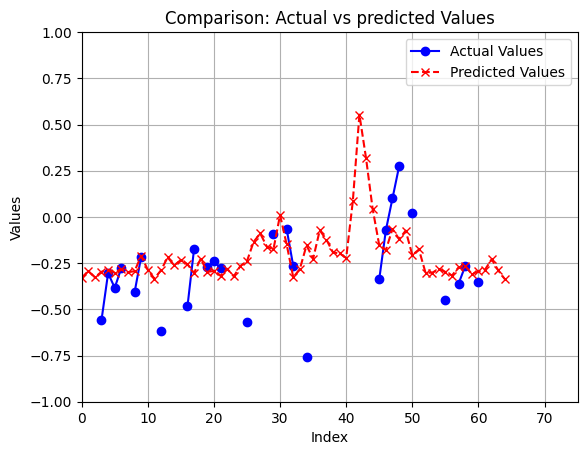

In [175]:
plt.plot(flattened_actual, marker='o', linestyle='-', color='b', label='Actual Values')

# Plotting the adjusted values
plt.plot(predicted_ndvi, marker='x', linestyle='--', color='r', label='Predicted Values')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison: Actual vs predicted Values')

# Adding grid
plt.grid(True)

# Adding legend to differentiate the lines
plt.legend()

# # Adjusting the limits of the axes
plt.xlim(0, 75)  # Example: Setting x-axis limits from 0 to 12
plt.ylim(-1, 1)   # Example: Setting y-axis limits from 0 to 1

# Display the plot
plt.show()

In [61]:
fill_nan_model = joblib.load('model_train/regressor/500points/fill_nan_model_gb.pkl')

In [71]:
predicted_ndvi = fill_nan_model.predict(LUATOM_vhvv[:][1])

ValueError: X has 13 features, but StandardScaler is expecting 2 features as input.